In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD


In [16]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

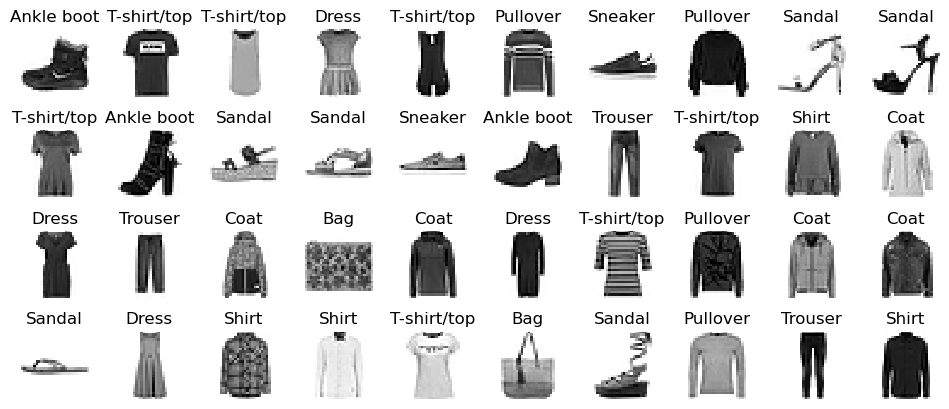

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_full[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train_full[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [18]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [19]:
X_train_full.shape

(60000, 28, 28)

Dividimos el X_train e y_train en dos (X_Valid y X_train) el cual se tiene que dividir entre 255 para escalar los valores

In [20]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

In [62]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(30,activation="relu"))
model.add(keras.layers.Dense(20,activation="relu"))

#Softmax convierte un vector de valores en una probabilidad de distribución
model.add(keras.layers.Dense(len(class_names),activation="softmax"))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 30)             │        23,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,380 (95.23 KB)

 Trainable params: 24,380 (95.23 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
#!pip install pydot_ng==2.0.0
#!pip install pydot==1.4.2
#!conda install -y graphviz

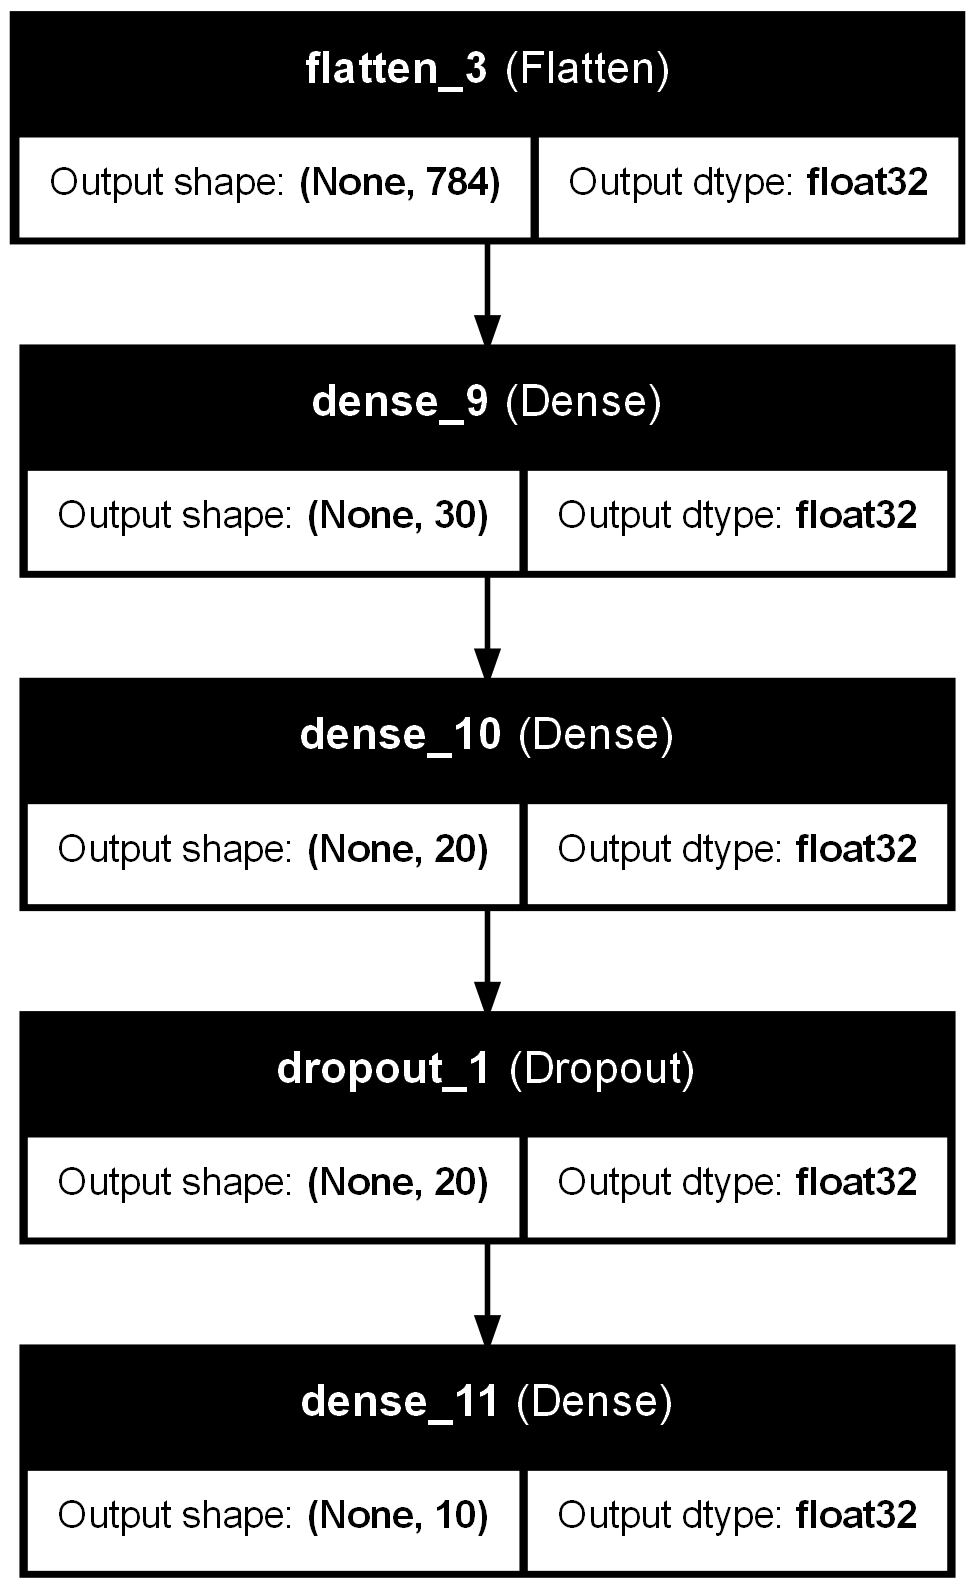

In [64]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True,show_dtype=True,show_layer_names=True,)

In [65]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [66]:

import sys


early_stopping_cb = keras.callbacks.EarlyStopping(patience=15,restore_best_weights=True)

history = model.fit(X_train,y_train,epochs=sys.maxsize,validation_data=(X_valid,y_valid),callbacks=[early_stopping_cb])

Epoch 1/9223372036854775807
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4687 - loss: 1.4901 - val_accuracy: 0.7972 - val_loss: 0.6166
Epoch 2/9223372036854775807
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7497 - loss: 0.7282 - val_accuracy: 0.8168 - val_loss: 0.5332
Epoch 3/9223372036854775807
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 942us/step - accuracy: 0.7765 - loss: 0.6398 - val_accuracy: 0.8348 - val_loss: 0.4767
Epoch 4/9223372036854775807
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 978us/step - accuracy: 0.7932 - loss: 0.5967 - val_accuracy: 0.8336 - val_loss: 0.4734
Epoch 5/9223372036854775807
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8035 - loss: 0.5641 - val_accuracy: 0.8470 - val_loss: 0.4370
Epoch 6/9223372036854775807
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 949us/step - accuracy: 0.8124 - loss: 0.5386 - val_accuracy: 0.8514 - val_loss: 0.4260
Epoch 7/9223372036854775807
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 971us/step - accuracy: 0.8156 - loss: 0.5311 - val

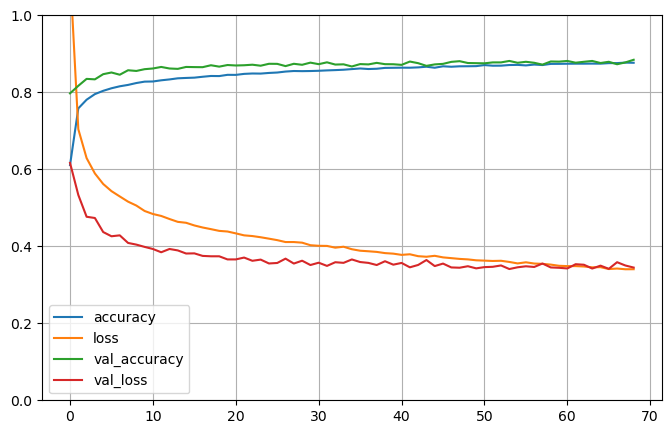

In [67]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
#1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 982us/step - accuracy: 0.9156 - loss: 0.2316 - val_accuracy: 0.8872 - val_loss: 0.3271

In [68]:
mse_test = model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.8703 - loss: 0.3768


In [69]:
X_nuevas = X_test
y_pred = model.predict(X_nuevas)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step


array([[3.01295631e-06, 6.50311183e-09, 1.92202333e-05, ...,
        3.53323556e-02, 3.16003616e-06, 9.63226676e-01],
       [5.39270218e-07, 1.35196975e-11, 9.89265442e-01, ...,
        6.31046604e-12, 1.27216138e-09, 2.67543691e-12],
       [1.27930999e-11, 1.00000000e+00, 4.91195973e-11, ...,
        1.06901460e-13, 1.04084743e-15, 4.75257142e-14],
       ...,
       [9.61474515e-03, 3.80246020e-05, 5.44561408e-05, ...,
        2.68059125e-06, 9.10361290e-01, 4.47191894e-07],
       [4.65125849e-09, 9.99996781e-01, 9.34948208e-09, ...,
        2.10093787e-09, 8.11102574e-11, 7.11554371e-10],
       [7.64643318e-08, 1.44431034e-09, 2.48062088e-06, ...,
        1.08449126e-03, 9.42229121e-07, 5.52503298e-06]], dtype=float32)

In [70]:
# Probabilidad de que sea uno de los 10 Clas Names
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.04, 0.  , 0.96],
       [0.  , 0.  , 0.99, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.01, 0.  , 0.  , ..., 0.  , 0.91, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [71]:
y_pred = np.argmax(y_pred, axis=1)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

In [72]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [73]:
x=0
for index,i in enumerate(y_test):
    if i != y_pred[index]:
        x+=1
print("DIFERENTES %i:%i"%(x,len(y_test)))

DIFERENTES 1308:10000
